# Data Science Portfolio - Part II (40 marks)

This question has been created to test your statistical analysis and programming knowledge in Python. 

You are given a `csv` file, which include various data entries for each football match in **English Premier League** during the 2020-2021 season. To name a few of these entries: date, referee name, number of goals, red cards, etc. The `csv` dataset you are provided contains one row per football match. The column names are abbreviations and given as: 

```
Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HC = Home Team Corners
AC = Away Team Corners
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
```


In this exercise, you are asked to perform a number of operations to:

 - perform statistical analysis of the data, and

 - gain insights from the data.

In [23]:
#C21126107
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
import arviz as az
import pymc3 as pm
from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

In [24]:
#C21126107
module_url = f"https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

df = pd.read_csv('EPL_season-2021.csv')
df = df.fillna('')

Fetching https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv


In [25]:
#C21126107
df.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,6,12,12,2,3,2,2,0,0
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,3,5,14,11,7,3,2,1,0,0
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,6,3,9,6,9,0,1,0,0,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,3,2,13,7,8,7,2,2,0,0
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,7,12,9,2,5,1,1,0,0
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,5,4,15,7,5,3,1,0,0,0
6,E0,14/09/2020,20:15,Brighton,Chelsea,1,3,A,0,1,...,3,5,8,13,4,3,1,0,0,0
7,E0,14/09/2020,18:00,Sheffield United,Wolves,0,2,A,0,2,...,2,4,13,7,12,5,2,1,0,0
8,E0,19/09/2020,12:30,Everton,West Brom,5,2,H,2,1,...,7,4,9,11,11,1,1,0,0,1
9,E0,19/09/2020,15:00,Leeds,Fulham,4,3,H,2,1,...,7,6,13,18,5,3,1,2,0,0


## P2.1 - Data Pre-processing and Exploratory Analysis (11 marks)

In this question, your task is to use `pandas` and other required modules to preprocess the data frame, `df`. Preprocessing will include: add/remove/recode columns in `df`. In addition, to further explore the dataset, you need to produce a number of exploratory plots. 

#### P2.1.1 - Add Booking Points Columns (1 marks) 

Sometimes, in order to better analyse any given data set, one can create a new type of feature by combining two or more existing entries of the data frame. In this question, you are asked to create a function `add_booking_pts(df)` which creates two new columns of: **Home booking points (HBP)**, and **Away booking points (ABP)** by using four existing columns of HY, AY, HR, and AR.

The details of the function `add_booking_pts(df)` are given below:

 - Takes the data frame `df` as input.
 
 - For each match, number of yellow cards is weighted with 10 points, whilst the number of red cards is with 25 points. 
 
 - Basically, the function calculates HBP and ABP columns as
    - $HBP = 10\cdot HY + 25\cdot HR$
    - $ABP = 10\cdot AY + 25\cdot AR$
 
 - These newly created arrays are added to `df`, whilst removing the columns for HY, AY, HR, and AR.
 
 - Finally, the updated `df` is returned.

In [26]:
#C21126107
def add_booking_pts(df):
    df["HBP"] = 10 * df["HY"] + 25 * df["HR"]
    df["ABP"] = 10 * df["AY"] + 25 * df["AR"]
    df = df.drop(columns=["HY", "AY", "HR", "AR"])
    return df
df = add_booking_pts(df)

In [27]:
#C21126107
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HS,AS,HST,AST,HF,AF,HC,AC,HBP,ABP
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,5,13,2,6,12,12,2,3,20,20
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,5,9,3,5,14,11,7,3,20,10
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,22,6,6,3,9,6,9,0,10,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,15,15,3,2,13,7,8,7,20,20
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,7,13,1,7,12,9,2,5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,19,5,5,4,10,8,14,1,20,20
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,21,8,11,3,8,10,7,5,20,20
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,12,10,3,3,11,1,8,9,30,10
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,14,17,7,5,5,9,2,3,0,30


#### P2.1.2 - Convert Table Colums into Digits (2 marks) 

When reading in the dataframe, one can see that it contains some textual data which will not be relevant for the numerical analyses in Question 1. Therefore, implement a function `convert_results(df)` 

1. (1 mark) to convert **half-time results (HTR)** and **full-time results (FTR)** into numerical data. The details of the function are given below: 
 
- HTR and FTR columns include string values of `'H'`, `'D'` and `'A'`. These string corresponds to the cases below:
    - `'H'`: Home team win

    - `'D'`: Draw

    - `'A'`: Away team win

- The function `convert_results(df)` will replace `'H'`, `'D'` and `'A'` values with `int` type values of of 1, 0, -1, respectively.

2. (1 mark) to convert **Time** column into `float` type values in interval of $[0, 24)$. Since an hour has 60 minutes, a 15-minute interval corresponds to quarter of an hour (i.e 0.25 hours). Considering this, some examples can be given:
 
- `'12.30'` will be `12.5`, or 
 
- `'18.15'` will be `18.25` or 
 
- `'17.00'` will be `17.0`
 
The function `convert_results(df)` should return the updated data frame `df`.

In [28]:
#C21126107
def convert_results(df):
  df['HTR'] = df['HTR'].map({'H': 1, 'D': 0, 'A': -1})
  df['FTR'] = df['FTR'].map({'H': 1, 'D': 0, 'A': -1})
  df.Time = pd.to_timedelta('00:'+df["Time"]).dt.total_seconds()/60

  return df

df = convert_results(df)  

#### P2.1.3 - Fair Play League Table (4 marks) 

Write a function `create_fair_play_table(df)` to depict a **barplot with horizontal bars** representing *total booking points*. The module `seaborn` and its corresponding methods and attributes must be used in this question.

Produce a bar for each team (use the HBP and ABP columns) and plot them in increasing order. The team with the top bar (*i.e.* lowest HBP+ABP) will represent the Fair Play League Champion. Also, print the statement below

```
The champions of the 2020-2021 Fair Play League is {locate the team here}.
```

![](https://drive.google.com/uc?export=view&id=11gYwhu-1D6dxEcmXK31pL5Zcop497w9i)

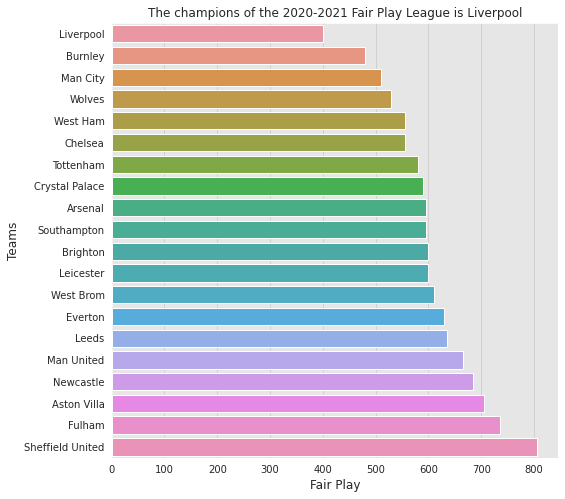

In [43]:
#C21126107
def create_fair_play_table(df):
    fair_p_dict = {} 
    for i in range(len(df)): 
        fair_p_dict[df['HomeTeam'][i]] = 0 
        fair_p_dict[df['AwayTeam'][i]] = 0 
    
    for i in range(len(df)): 
        fair_p_dict[df['HomeTeam'][i]] += df['HBP'][i] # add points to home team
        fair_p_dict[df['AwayTeam'][i]] += df['ABP'][i] # add points to away team

    df_plot = pd.DataFrame.from_dict(fair_p_dict, orient='index') 
    df_plot.columns = ['FP'] # add column name
    df_plot.sort_values(by='FP', ascending=True, inplace=True) # sort dataframe by FP
    df_plot.reset_index(inplace=True) 
    df_plot.rename(columns={'index':'Teams'}, inplace=True)

    sns.set_color_codes("pastel")
    fig = plt.figure(figsize=(8,8))
    ax = sns.barplot(x='FP', y='Teams', data=df_plot) # plot dataframe
    ax.set_title("The champions of the 2020-2021 Fair Play League is {}".format(df_plot['Teams'][0]))
    ax.set_xlabel('Fair Play', size=12)
    ax.set_ylabel('Teams', size=12) 

df_fp = create_fair_play_table(df)

### P2.1.4 - Expected number of goals vs. Exact scores (4 marks) 

Expected number of goals (xG) is a predictive model used to assess every goal-scoring chance, and the likelihood of scoring. Nowadays, xG has a strong algorithm behind it, but in this example, we will assume two basic models to calculate the xG of any football team for any game:
 
 - $xG_1 = 0.1 \cdot S$
 
 - $xG_2 = 0.1 \cdot S + 0.05\cdot SoT$

where $S$ and $SoT$ is the total number of shoots and total shoots on target, respectively.

Write a function `xG_plot(df)` to plot $xG_1$, $xG_2$ and exact number of goals scored by a randomly selected football team for whole 38 game weeks. 

This exploratory analysis will depict two sub-plots:
 
 1. Running mean of all three variables (xG1, xG2 and Goals). Running mean shows the average of a value up to a time step. For example: running mean of xG1 for week 5 is $\frac{1}{5}\sum_{i=0}^{4}xG1_{i}$, or similarly for week 17 is $\frac{1}{17}\sum_{i=0}^{16}xG1_{i}$.

 2. Cumulative sum of all three variables (xG1, xG2 and Goals). (Hint: `np.cumsum()`)

Use different colours, line styles, legends, etc. to make the exploratory analysis more understandable. The function also returns calculated xGs for the randomly selected team in a `dict` type object of form `{team : (xG1, xG2)}`

![](https://drive.google.com/uc?export=view&id=1Y3uSzRQaKumgoKoNdkohYBhpgBrOkYeO)

In [31]:
#C21126107
# FTHG = Full Time Home Team Goals
# FTAG = Full Time Away Team Goals
# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target

In [32]:
#C21126107
import random

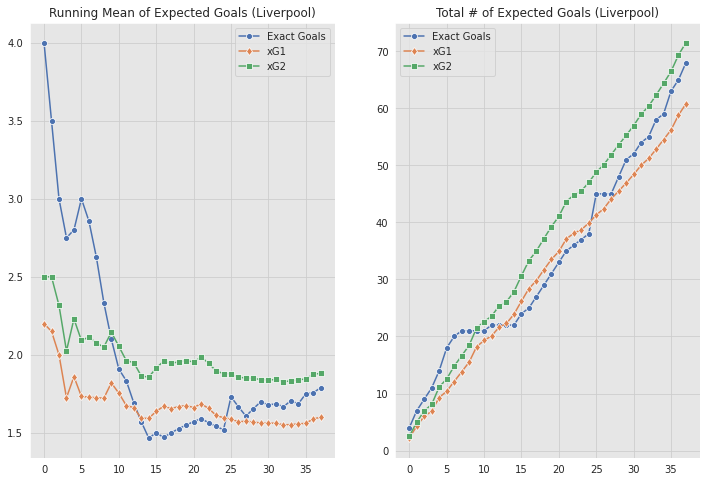

{'Liverpool': (array([2.2, 2.1, 1.7, 0.9, 2.4, 1.1, 1.7, 1.7, 1.7, 2.7, 1.1, 0.8, 1.5,
         0.7, 1.6, 2.3, 2.2, 1.4, 1.9, 1.8, 1.4, 2.2, 1. , 0.6, 1.2, 1.4,
         1.1, 1.7, 1.4, 1.4, 1.5, 1.6, 1.2, 1.6, 1.7, 1.7, 2.6, 2. ]),
  array([2.5 , 2.5 , 1.95, 1.15, 3.05, 1.4 , 2.25, 1.8 , 1.85, 3.  , 1.15,
         0.95, 1.8 , 0.75, 1.75, 2.8 , 2.65, 1.7 , 2.15, 2.1 , 1.8 , 2.6 ,
         1.15, 0.7 , 1.5 , 1.8 , 1.3 , 1.75, 1.75, 1.65, 1.7 , 2.  , 1.4 ,
         1.95, 2.05, 2.1 , 2.9 , 2.15]))}

In [33]:
#C21126107
# calculate running mean
def running_mean(x):
    rm = []
    for i in range(len(x)):
        rm.append(x[:i+1].sum()/(i+1))
    return rm

def xG_plot(df):
  HomeTeam = df['HomeTeam'].tolist()
  AwayTeam = df['AwayTeam'].tolist()
  Teams = HomeTeam + AwayTeam

  #randomise
  team = random.choice(Teams)

  home = df[df['HomeTeam'] == team]
  away = df[df['AwayTeam'] == team]

  #total shoots
  HomeShoots = home['HS'].to_numpy()
  AwayShoots = away['AS'].to_numpy()
  s = np.append(HomeShoots, AwayShoots)

  #total shoots on target
  HomeShootsTarget = home['HST'].to_numpy()
  AwayShootsTarget = away['AST'].to_numpy()
  st = np.append(HomeShootsTarget, AwayShootsTarget)

  #exact no of goals
  ExactHome = home['FTHG'].to_numpy()
  ExactAway = away['FTAG'].to_numpy()
  TotalExact = np.append(ExactHome, ExactAway)

  xG1 = s * 0.1
  xG2 = s * 0.1 + st * 0.05

  #running mean
  RunningxG1 = running_mean(xG1)
  RunningxG2 = running_mean(xG2)
  RunningTotal = running_mean(TotalExact)

  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))
  ax1 = sns.lineplot(data = RunningTotal, label = 'Exact Goals', marker = 'o', dashes = False, ax = ax1)
  sns.lineplot(data = RunningxG1, label="xG1", marker = "d", dashes=False, ax=ax1)
  sns.lineplot(data=RunningxG2, label="xG2", marker="s", dashes=False, ax=ax1)
  ax1.set_title("Running Mean of Expected Goals ({})".format(team))

  #cumsum
  cumsum_xG1 = np.cumsum(xG1)
  cumsum_xG2 = np.cumsum(xG2)
  c_total = np.cumsum(TotalExact)

  ax2 = sns.lineplot(data=c_total, label="Exact Goals", marker='o', dashes=False, ax=ax2)
  ax2.set_title("Total # of Expected Goals ({})".format(team))
  sns.lineplot(data=cumsum_xG1, label="xG1", marker='d', dashes=False, ax=ax2)
  sns.lineplot(data=cumsum_xG2, label="xG2", marker='s', dashes=False, ax=ax2)

  plt.show()

  return {team: (xG1, xG2)} 

xG_plot(df)   

## P2.2 - Statistical Analysis (29 marks)

#### P2.2.1 - Model selection for Regression Analysis (9 marks)

In this question, we construct a regression analyses to investigate how well FTHG (or FTAG) can be predicted from the other variables in the dataframe. The objective of this question is to derive a sparse model (linear and polynomial) with fewer variables. 

#### P2.2.1.1 - Variable Selection for Linear Regression (5 marks)

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a dictionary of variables. For this analysis, firstly, either all Home or Away teams will be marked and the predictors given below will be used

  - Home: [Time, FTR, HTHG, HTR, HS, HST, HF, HC, HBP]
  
  - Away: [Time, FTR, HTAG, HTR, AS, AST, AF, AC, ABP]. 
 
 - `main_target` is the variable for the regression, Home: FTHG (or Away: FTAG)
 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is the dictionary which stores the selected subset of initial `main_pred` both for home and away teams, in a format of `main_pred = {'Home': [... selected predictors here ...], 'Away': [... selected predictors here ...]}`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - Stage 1 (adding predictors): you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - Stage 2 (removing non-significant predictors): if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [34]:
def select_variable(df, main_pred, main_target, alpha):
  variables = {'Home': [], 'Away' : []}

  #loop for main prediction
  for x in main_pred:
    last_max = 0
    #for all
    for n in range(9):
      act_max = 0
      y = None
      #obtain varaiable with greatest adjusted r^2 
      for i in range(len(main_pred[x])):
        #add variables to the model
        features = variables[x] + [main_pred[x][i]]
        #obtain the main model
        model = sm.OLS(df[main_target[x]], df[features])
        fitter = model.fit()
        #if adjusted r^2: to be greater than max
        if fitter.rsquared_adj > act_max:
          act_max = fitter.rsquared_adj
          y = main_pred[x][i]


    #stage 2
    # exit when any variable increased adjusted r^2
      if act_max > last_max:
       variables[x].append(y)
       main_pred[x].remove(y)
       last_max = act_max
      else:
        break 

     #remove insignificant varaibles
    while True:
        #model with remaining features
        model2 = sm.OLS(df[main_target[x]], df[variables[x]])
        fitter2 = model2.fit()
        rem_var = variables[x]

        act_max = 0
        lowest_signf = None
        #go through all 
        for var in rem_var:
            #find if any variable with max pvalue > alpha
            pvalue = fitter2.pvalues.loc[var]
            if pvalue > alpha and pvalue > act_max:
                act_max = pvalue
                lowest_signf = var

        #remove those with max pvalue
        if lowest_signf:
            variables[x].remove(lowest_signf)
        else:
            break 

  return variables     


main_pred = {'Home': ['Time', 'FTR', 'HTHG', 'HTR', 'HS', 'HST', 'HF', 'HC', 'HBP'], 'Away': ['Time', 'FTR', 'HTHG','AS','AST','AF','AC','ABP']}
main_target={'Home' : 'FTHG', 'Away': 'FTAG'}
alpha=0.05
significant_predictors = select_variable(df, main_pred, main_target, alpha)
significant_predictors        

{'Away': ['AST', 'FTR', 'HTHG', 'AF'], 'Home': ['HTHG', 'HST', 'FTR', 'HTR']}

#### P2.2.1.2 - Model Selection for Polynomial Regression (4 marks)

Often the dataset provided is not linearly separable and a simple linear regression model may not be able to derive relationships between both the independent and dependent variables. In such cases, a possible solution would be to implement polynomial regression instead (https://en.wikipedia.org/wiki/Polynomial_regression). Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$.

**Example:** Given $y$ the dependent variable, $x_1, x_2$ the independent variables, $b_0$ the bias and $b_1,b_2,...,b_n$ the weights a polynomial regression of degree 2 would have the form:

$$y = b_0 + b_1x_1 + b_2x_1^2 + b_3x_2 + b_4x_2^2$$

Implement a function `polynomial_model(df, main_pred, main_target, degrees)` which uses the selected subset of variables as an argument from the function `select_variable()`, and calculates all possible combinations of the variable set and polynomial degrees. The function `polynomial_model()` finds the degree that yields the best polynomial model (according to the adjusted R-squared metric) to predict the value of a FTHG or FTAG as in the linear regression part above.

Arguments and outputs of the function are given as

 - a dataframe `df`, 

 - a dictionary `main_pred` indicating the predictors for home and away, 
 
 - a dictionary `main_target` indicating target variable for home and away, 
 
 - a list of integers indicating the degrees to test degrees, 
 
The function should return 

 - the best fitted regression model, and best polynomial degree for home and away in a dictionary `main_predp` of format `main_predp = {'Home': (best_fit, best_degree), 'Away': (best_fit, best_degree)}`..

In [35]:
#C21126107
from sklearn.preprocessing import PolynomialFeatures

In [36]:
#C21126107
def polynomial_model(df, main_pred, main_target, degrees):
  main_predp = {}
  for x in main_target:
    act_max = 0
    best_model = None
    highest_deg = None
    #go through all degrees
    for degree in degrees:
      #polynomial feature transformation
      pol_features = PolynomialFeatures(degree = degree)
      xp = pol_features.fit_transform(df[main_pred[x]])
      model = sm.OLS(df[main_target[x]], xp).fit()
      #obtain adjesuted r^2
      r_squared = model.rsquared_adj
      #find degree giving max adjusted r^2
      if r_squared > act_max:
        act_max = r_squared
        highest_deg = degree
        best_model = model

    main_predp[x] = (model, highest_deg)

  return main_predp       

polynomial_model(df, significant_predictors, main_target, list(range(1,5)))

{'Away': (<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f8b00bae5d0>,
  3),
 'Home': (<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f8b0022b290>,
  4)}

#### P2.2.2 - Predicting Match Result (5 marks)


Create a function `predict_result()` which predicts the result of **Man City - Everton** football match which was played on 23/05/2021. In order to do this, firstly crop last last 10 rows of the data frame `df` to use only the first 37 weeks (370 matches) of the season to fit your regressors.

The function `predict_result()` will use `select_variable()` and `polynomial_model()` function outputs as the best linear and polynomial regression models. Then by using these two models, it predicts the number of goals scored by Home and Away teams separately, which will lead to the result of the match. Finally, print the information below:

```
Linear regression prediction        : Man City x - y Everton
Polynomial regression prediction    : Man City a - b Everton
Correct result                      : Man City 5 - 0 Everton
```

In [37]:
#C21126107
def predict_result(df):
  result = {'Home': [], 'Away': []}
  for key in main_target:
    #crop last 10 rows
    df_train = df.iloc[:-10]
    #get more significant variables
    sign_var = select_variable(df_train, main_pred, main_target, alpha)
    #prediction data
    x_test = df.loc[(df['HomeTeam'] == 'Man City') & (df['AwayTeam'] == 'Everton') & (df['Date'] == '23/05/2021')]

    #test model
    linear_model = sm.OLS(df_train[main_target[key]], df_train[sign_var[key]]).fit()

    #prediction with linear model
    y_pred_linear = linear_model.predict(x_test[sign_var[key]])
    result[key].append(y_pred_linear.values[0])

    #best degree
    pol_model = polynomial_model(df_train, sign_var, main_target, list(range(1,5)))[key]
    best_deg = pol_model[1]
    pol_model = pol_model[0]

    #transformation prediction data with best degree
    pol_features = PolynomialFeatures(degree=best_deg)
    x_testp = pol_features.fit_transform(x_test[sign_var[key]])

    #prediction using polynomial regression
    y_pred_poly = pol_model.predict(x_testp)
    result[key].append(round(y_pred_poly[0]))
    result[key].append(round(x_test[main_target[key]].values[0]))

  print(f"Linear regression prediction        : Man City {int(result['Home'][0])} - {int(result['Away'][0])} Everton")
  print(f"Polynomial regression prediction    : Man City {int(result['Home'][1])} - {int(result['Away'][1])} Everton")
  print(f"Correct result                      : Man City {int(result['Home'][2])} - {int(result['Away'][2])} Everton")   

In [38]:
#C21126107
main_pred = {'Home': ['Time', 'FTR', 'HTHG', 'HTR', 'HS', 'HST', 'HF', 'HC', 'HBP'], 'Away': ['Time', 'FTR', 'HTHG','AS','AST','AF','AC','ABP']}
main_target={'Home' : 'FTHG', 'Away': 'FTAG'}
alpha=0.05
predict_result(df)

Linear regression prediction        : Man City 3 - 1 Everton
Polynomial regression prediction    : Man City 4 - 1 Everton
Correct result                      : Man City 5 - 0 Everton


#### P2.2.3 - Maximum likelihood estimation (MLE) and prediction (10 marks)

In this question, you are expected to solve a regression problem, but this time using **maximum likelihood estimation (MLE)** theory. You need to construct a regression analysis to investigate how well the **full time results (FTR)** can be predicted from the other variables of FTHG, HS, HC, AS, AC. 

#### P2.2.3.1 - ML Estimate of regression parameters (7 marks)

Create a function `ML_estimate(df_est, pred, target)` which calculates the ordinary least squares (OLS) and two MLE fits (Poisson and Probit) for the given arguments.

You need to use `statsmodels` module and its corresponding methods of `.OLS()`, `.Poisson()` and `.Probit()`.

- `df_est` is a subset of the data frame `df` which includes **randomly selected** 280 rows of `df`. The remaining 100 rows will be used in prediction application (see below).

- `pred` is a list of variables. For this analysis, OLS and other models utilise the predictors of FTHG, HS, HC, AS, AC. (Note: Depending on your implementation, you might need to add a constant to the predictors. Please see the lecture notes)

- `target` is the target variable for the regression, FTR. You need to adjust values of this column for the purpose of this question. 
 
  - FTR = 1.0 if Home team wins.
  
  - FTR = 0.0 if Away team wins or a Draw.

The function should return variables 

 - `MLE_model_fits` a `tuple` object which stores all three model fits `statsmodels` objects for OLS, Probit and Poisson.

In [39]:
#C21126107
def ML_estimate(df_est, pred, target):
  ols = sm.OLS(target, df_est[pred]).fit()
  #poisson model
  poisson = sm.Poisson(target, df_est[pred]).fit()
  #probit model
  probit = sm.Probit(target, df_est[pred]).fit()

  return ols, poisson, probit

In [40]:
#C21126107
#changing FTR varaible to binary format
df.loc[df.FTR < 1 , 'FTR'] = 0

#select 280 rows
train = df.sample(frac = 280/380)
#remaining 100 to test set
test = df.drop(train.index)

#selecting target and prediction variables
target = train['FTR']
pred = ['FTHG', 'HS', 'HC', 'AS', 'AC']  

#fitting the model
MLE_model_fits = ML_estimate(train, pred, target)
print(MLE_model_fits)

Optimization terminated successfully.
         Current function value: 0.653692
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.357070
         Iterations 7
(<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b0157eb50>, <statsmodels.discrete.discrete_model.PoissonResultsWrapper object at 0x7f8b00781e90>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f8b00e70850>)


#### P2.2.3.2 - Predicting Home Win via MLE (3 marks)

Create a function `ML_predict(df_pred, MLE_model_fits)` which calculates FTR predictions for all three models of OLS, Probit and Poisson.

You need to use `statsmodels`' method for prediction: `.predict()`.

- `df_pred` is a subset of the data frame `df` which includes only a subset of 100 rows of `df`.

- `MLE_model_fits` is a `tuple` object obtained from the `ML_estimate()` function above. Unpack this argument to obtain `statsmodels` objects for all three models. 

This function should return: 

 - `df_pred`

 - `MLE_model_predictions` is a `tuple` which stores the predicted outputs for each three models.  

In [41]:
#C21126107
def ML_predict(df_pred, MLE_model_fits):
    #models
    ols = MLE_model_fits[0]
    poisson = MLE_model_fits[1]
    probit = MLE_model_fits[2]
    pred = ["FTHG", "HS", "HC", "AS", "AC"]

    #predictions
    pred_ols = ols.predict(df_pred[pred])
    pred_poisson = poisson.predict(df_pred[pred])
    pred_probit = probit.predict(df_pred[pred])
    
    return df_pred, (pred_ols.values, pred_probit.values, pred_poisson.values)

MLE_predictions = ML_predict(test, MLE_model_fits)
MLE_predictions

(    Div        Date   Time          HomeTeam     AwayTeam  FTHG  FTAG  FTR  \
 4    E0  13/09/2020  14.00         West Brom    Leicester     0     3    0   
 6    E0  14/09/2020  20.25          Brighton      Chelsea     1     3    0   
 7    E0  14/09/2020  18.00  Sheffield United       Wolves     0     2    0   
 8    E0  19/09/2020  12.50           Everton    West Brom     5     2    1   
 9    E0  19/09/2020  15.00             Leeds       Fulham     4     3    1   
 ..   ..         ...    ...               ...          ...   ...   ...  ...   
 361  E0  18/05/2021  18.00       Southampton        Leeds     0     2    0   
 364  E0  19/05/2021  18.00           Everton       Wolves     1     0    1   
 366  E0  19/05/2021  18.00         Tottenham  Aston Villa     1     2    0   
 371  E0  23/05/2021  16.00       Aston Villa      Chelsea     2     1    1   
 374  E0  23/05/2021  16.00         Leicester    Tottenham     2     4    0   
 
      HTHG  HTAG  ...  AS HST  AST  HF  AF  HC  AC

#### P2.2.4 - Evaluating Prediction Performance (5 marks)

You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy, and mean square error (MSE) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - $N = 100$ samples of predictions from each model, stored in `MLE_model_predictions`.
 
 - The ground-truth FTR values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$ and its average is $\bar{P}$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - FTR_i)^2$$

In order to obtain the prediction accuracy for each model, you first should convert continuous prediction results into the binary form (either 1.0 or 0.0). The binarisation process will follow the piecewise function below:

  $$P_{binary, i} = \begin{cases} 1.0, & P_i \geq \bar{P}\\ 0.0, & \text{otherwise}  \end{cases} \quad \text{where} \quad i = 0, 1, \dots, 99$$

Then the percentage accuracy, $Acc\%$ is calculated as

$$ Acc\% = 100 - \sum_{i=0}^{99} |P_{binary, i} - FTR_i|$$

Following these, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | OLS         |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | MLE-Probit  |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | MLE-Poisson |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, using `sklearn` method `RocCurveDisplay()`, the `prediction_perf()` function should 

 - `print` and `return` the data frame `df_results`.

**Marking for this question**
 - (2 marks) Calculating MSE and $Acc\%$ metrics correctly.
 - (3 marks) Creating and returning dataframe `df_results`.
 
with a condition that all these three operations are performed in a **fully working `prediction_perf()` function**.

         Model  Acc%       MSE       AUC
0          OLS    87  0.125789  0.879881
1   MLE-Probit    80  0.116294  0.797963
2  MLE-Poisson    78  0.175865  0.761460


,Model,Acc%,MSE,AUC
0,OLS,87,0.125789,0.879881
1,MLE-Probit,80,0.116294,0.797963
2,MLE-Poisson,78,0.175865,0.761460


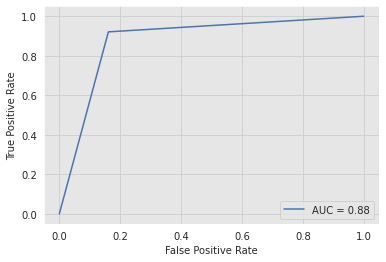

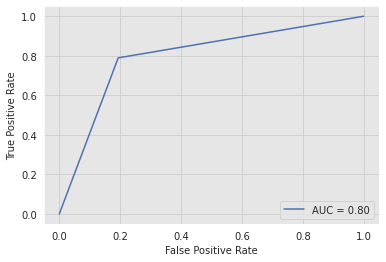

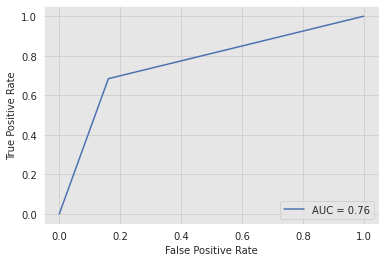

In [42]:
#C21126107
def prediction_perf(gt, MLE_model_predictions):
  Accs = []
  MSEs = []
  AUCs = []
  for i in range(3):
    predictions = MLE_model_predictions[1][i]

    #mean squared error
    MSE = ((gt-predictions)**2).sum()/gt.shape[0]
    MSEs.append(MSE)

    #convert to binary
    average = predictions.mean()
    predictions = np.where(predictions > average, 1, 0)

    #AUC values
    false_p_r, true_p_r, theesholds = roc_curve(gt, predictions)
    AUC_values = auc(false_p_r, true_p_r)
    AUCs.append(AUC_values)

    #plot Roc curve
    curve = RocCurveDisplay(fpr = false_p_r, tpr = true_p_r, roc_auc = AUC_values)
    curve.plot()

    #accuracy
    Acc = (100 - abs(gt - predictions).sum())
    Accs.append(Acc)

  df_results = pd.DataFrame()
  df_results['Model'] = ['OLS', 'MLE-Probit', 'MLE-Poisson']
  df_results['Acc%'] = Accs
  df_results['MSE'] = MSEs
  df_results['AUC'] = AUCs

  print(df_results)

  return df_results

results = prediction_perf(test['FTR'], MLE_predictions)
results  